# Without sWeights: `common_B0TODst3pi_Dst_constr_BDT-1.25`

# Plot the fit
    
I just want to recreate the figure of the fit to $m(D^*3\pi)$ with BDT > -1.25, with the colors I cherish.

In [4]:
data_name_B0toDstDs = 'common_B0TODstDs_Dst_constr'
data_name_Dstto3pi = 'common_DstTO3pi' # same as sWeights as the unconstrained case

BDT_name = 'gradient'

cut_BDT = -1.25

data_name_B0toDstDs_BDT = data_name_B0toDstDs + f'_BDT{cut_BDT}'

In [7]:
branch_constr = 'Dst_constr_B0_M'
low_DstDs = 5150.
high_DstDs = 5350.

## Import

In [1]:
import zfit
import json
import numpy as np
import timeit

from bd2dst3pi.locations import loc
from bd2dst3pi.definition import years, magnets
from bd2dst3pi.pandas_root import add_constr_Dst

import sys
sys.path.append(loc.ROOT + 'library/')

from HEA.plot import plot_hist_auto, plot_hist
from HEA.plot.fit import plot_hist_fit_auto
from HEA.fit import json_to_latex_table, retrieve_params, show_latex_table, get_params_without_BDT
from HEA.fit.fit import launch_fit, save_params, define_zparams, sum_crystalball_or_gaussian
from HEA.tools import show_dictionnary
import HEA.plot.tools as pt
from HEA.pandas_root import save_root, load_saved_root
from HEA import get_raw_branches_from_raw_branches_functions

Welcome to JupyROOT 6.22/02


## Load

### Json files

In [5]:
# B0->DstDs with BDT cut (for the B0->DstDs PDF shape)
DstDs_params = get_params_without_BDT(retrieve_params(data_name_B0toDstDs_BDT, folder_name=data_name_B0toDstDs), False) 
del DstDs_params['info_fit']

### Root file

In [8]:
df_DstDs = load_saved_root(data_name_Dstto3pi+f'_BDT{cut_BDT}', folder_name=data_name_Dstto3pi, vars=[branch_constr, 'BDT', 'sWeight'])

Loading /afs/cern.ch/user/c/correian/bd2dst3pi/output//root/common_DstTO3pi/common_DstTO3pi_BDT-1.25.root


## Range of the variables

### Constrained $m(D^* 3\pi)$ of the `common` data

## PLOT

### Values

In [9]:
initial_values_DstDs = DstDs_params

In [10]:
for key, value in DstDs_params.items():
    initial_values_DstDs[key] = {'value': value, 'floating':True}

### Observables and variables

In [11]:
obs_DstDs = zfit.Space("x", limits=(low_DstDs, high_DstDs))
zparams_DstDs = define_zparams(initial_values_DstDs, cut_BDT=cut_BDT)

### PDFs

In [12]:
gaussianS_DstDs = zfit.pdf.Gauss(zparams_DstDs[f'mu_DstDs'],zparams_DstDs['sigma_DstDs'],obs=obs_DstDs)
exponential_DstDs = zfit.pdf.Exponential(zparams_DstDs['lambda_DstDs'], obs=obs_DstDs)
gaussian_DstDs = zfit.pdf.Gauss(zparams_DstDs['mu2_DstDs'],zparams_DstDs['sigma2_DstDs'],obs=obs_DstDs)

gaussianS_DstDs_ext = gaussianS_DstDs.create_extended(zparams_DstDs['n_sig_DstDs'])
exponential_DstDs_ext = exponential_DstDs.create_extended(zparams_DstDs['n_bkg_DstDs'])
gaussian_DstDs_ext = gaussian_DstDs.create_extended(zparams_DstDs['n_bkg2_DstDs'])

model_DstDs = zfit.pdf.SumPDF([gaussianS_DstDs_ext, exponential_DstDs_ext, gaussian_DstDs_ext])

### Plotting

In [13]:
latex_params_B0toDstDs_BDT = {}
for key, value in latex_params_B0toDstDs.items():
    latex_params_B0toDstDs_BDT[f"{key}|BDT{cut_BDT}"] = value

/afs/cern.ch/user/c/correian/bd2dst3pi/library/HEA/plot/fit.py:761: UserWarning: The function <function Space.limits at 0x7f96e4878dd0> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[5150.]]), array([[5350.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.
  low = float(obs.limits[0])
/afs/cern.ch/user/c/correian/bd2dst3pi/library/HEA/plot/histogram.py:84: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


Number of bins: 100
Width of the bins: 2.0

Number of d.o.f. in the model:  8
Reduced chi2:  5.210714420093507

Mean of the normalised residuals: -0.1340045126238366
Std of the normalised residuals: 1.8309745199356509


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


Figure saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/plots//common_B0TODstDs_Dst_constr/Dst_constr_B0_M_common_B0TODstDs_Dst_constrBDT-1.25_details_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='$m$($D^*3\\pi|m(D^*)$=2010.26 MeV/$c^2$) [MeV/$c^2$]', ylabel='Candidates / (2 MeV/$c^2$)'>,
 <AxesSubplot:xlabel='(reduced $\\chi^2$=5.21)', ylabel='residuals / $\\sigma$'>)

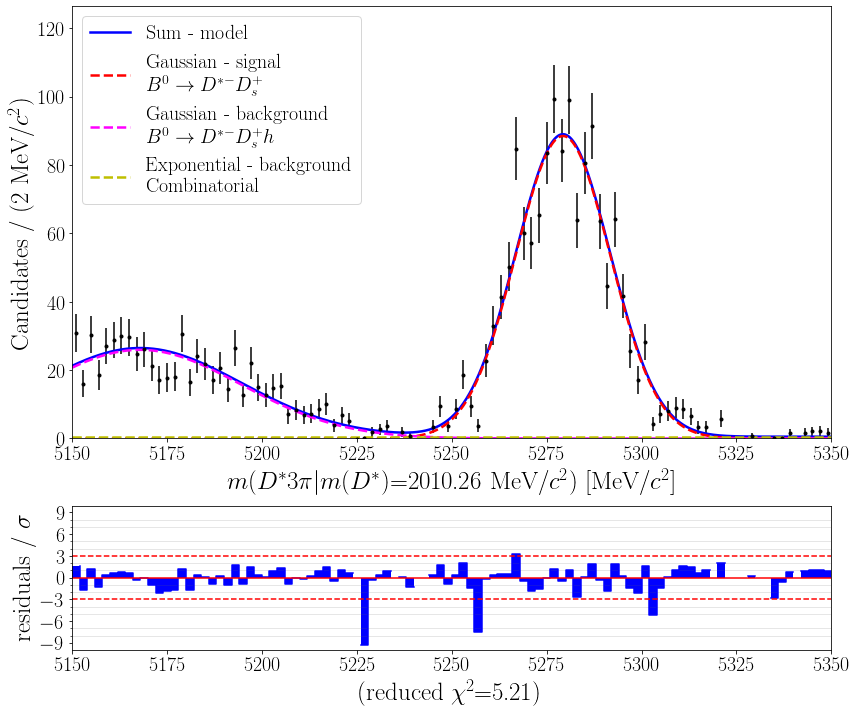

In [15]:
plot_hist_fit_auto(df_DstDs, branch_constr, models=[model_DstDs, gaussianS_DstDs_ext, gaussian_DstDs_ext, exponential_DstDs_ext],
                   models_names=["", '\n $B^0\\to D^{*-}D_s^+$','\n $B^0\\to D^{*-}D_s^+ h$',
                                  '\n Combinatorial'],
                   obs=obs_DstDs, n_bins = 100, bar_mode = False,
                   data_name=data_name_B0toDstDs+f'BDT{cut_BDT}'+'_details', folder_name=data_name_B0toDstDs,
                   colors=['b','r','magenta','y'], weights=df_DstDs['sWeight'],
                   colWidths=[0.05,0.01,0.05,0.04], show_chi2=True,
                   fontsize_res = 18.,
                   fontsize_leg=20)

/afs/cern.ch/user/c/correian/bd2dst3pi/library/HEA/plot/histogram.py:84: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(counts)


Number of bins: 45
Width of the bins: 4.444444444443434

Number of d.o.f. in the model:  8
Reduced chi2:  2.4168959037455435

Mean of the normalised residuals: 0.05171132991415487
Std of the normalised residuals: 1.183566415694079
Figure saved in /afs/cern.ch/user/c/correian/bd2dst3pi/output/plots//common_B0TODstDs_Dst_constr/Dst_constr_B0_M_common_B0TODstDs_Dst_constrBDT-1.25_fit


(<Figure size 864x720 with 2 Axes>,
 <AxesSubplot:xlabel='$m$($D^*3\\pi|m(D^*)$=2010.26 MeV/$c^2$) [MeV/$c^2$]', ylabel='Candidates / (4.44 MeV/$c^2$)'>,
 <AxesSubplot:ylabel='residuals / $\\sigma$'>)

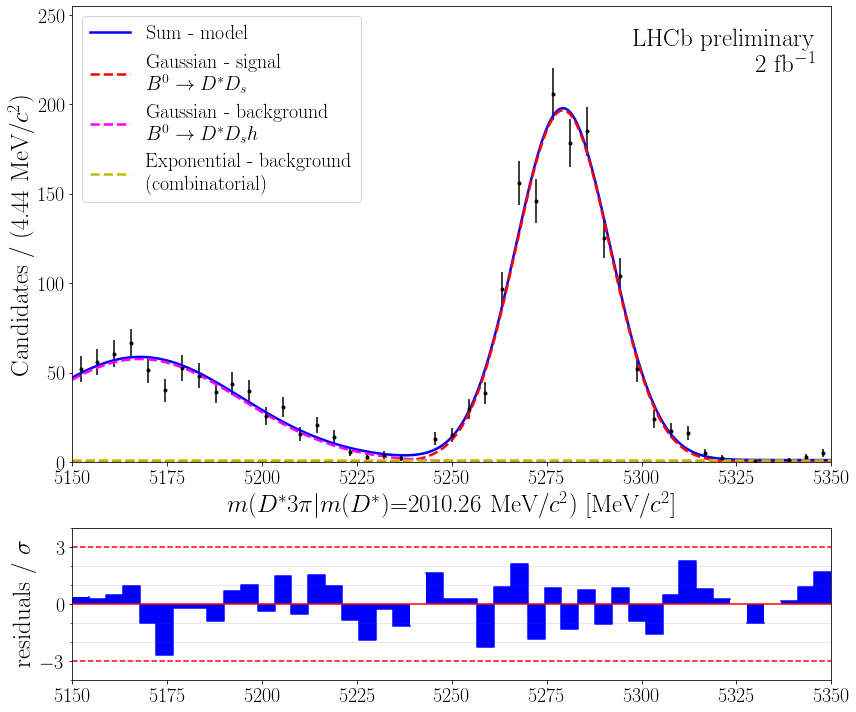

In [17]:
n_bins=50

plot_hist_fit_auto(df_DstDs, branch_constr, models=[model_DstDs, gaussianS_DstDs_ext, gaussian_DstDs_ext, exponential_DstDs_ext],
                       models_names = ["", '\n $B^0\\to D^*D_s$','\n $B^0\\to D^*D_s h$',
                                      '\n (combinatorial)'],
                       obs=obs_DstDs, n_bins = 45,bar_mode = False,
                       data_name = data_name_B0toDstDs+f'BDT{cut_BDT}', folder_name=data_name_B0toDstDs,
                       colors=['b','r','magenta','y'], weights=df_DstDs['sWeight'],
                       fontsize_res = 18., pos_text_LHC='right',
                       fontsize_leg=20)


In [18]:
json_to_latex_table(data_name_B0toDstDs_BDT, data_name_B0toDstDs, latex_params_B0toDstDs)

Latex table in /afs/cern.ch/user/c/correian/bd2dst3pi/output/tables/common_B0TODstDs_Dst_constr/common_B0TODstDs_Dst_constr_BDT-1.25_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$\lambda_{B,c}$&$(-0.0\pm4.2)e-07$\\
\hline
$\mu_{B, D^* D_s h}$&$5167.9\pm3.2$\\
\hline
$\mu_S$&$5279.31\pm0.53$\\
\hline
$n_{B, D^* D_s h}$&$650\pm47$\\
\hline
$n_{B,c}$&$53\pm83$\\
\hline
$n_S$&$1381\pm52$\\
\hline
$\sigma_{B, D^* D_s h}$&$26.7\pm2.3$\\
\hline
$\sigma_S$&$12.45\pm0.51$\\
\hline
\end{tabular}


### Params

In [19]:
fitted_params = retrieve_params(data_name_B0toDstDs_BDT, folder_name=data_name_B0toDstDs)

In [20]:
fitted_params

{'info_fit': '------------------------------------------------------------------\n| FCN = -4023                   |     Ncalls=121 (121 total)     |\n| EDM = 8.06e-07 (Goal: 0.001)  |            up = 0.5            |\n------------------------------------------------------------------\n|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |\n------------------------------------------------------------------\n|     True      |     True      |   False   |       False        |\n------------------------------------------------------------------\n| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |\n------------------------------------------------------------------\n|     False     |     True      |   True    |   True    | False  |\n------------------------------------------------------------------',
 'lambda_DstDs|BDT-1.25': -9.117706589734098e-15,
 'lambda_DstDs|BDT-1.25_err': 4.1630389780893493e-07,
 'mu2_DstDs|BDT-1.25': 5167.9060601861165,
 'mu2_DstDs|BDT-1.25_e